<h1>Bitcoin Price Heartbeat</h1>
<p>In this project we will try to classify daily bitcoin price movements by finding patterns in the data.</p>
<p>The data consists of bitcoin prices each minute from August 2010 to February 2021.</p>
<p>The data comes from Bitstamp's API. Bitstamp is a cryptocurrency exchange company.</p>
<br>
<h2>Process</h2>
<p>For classification purposes, every sample consist of the change in the bitcoin price every minute of a given day. Absolute values, relu function and Furier Transform will also be used.</p>
<p>We will extract features from each sample (mean, median, standard deviation, minimum, maximum, z-score, min-max range, etc, exchange volume, positive/negative ratio, etc.)</p>
<p>We then will make use of unsupervised machine learning algorithms to find clusters of the samples.</p>
<p>The hypothesis is that certain clusters could be associated or predict important movements in the bitcoin price.</p>

In [3]:
#import libraries
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load files containing data by minute.
file1 = pd.read_csv('../data/external/bitstamp_btc_ohlc_data_1min_999_final.csv')
file2 = pd.read_csv('../data/external/bitstamp_btc_ohlc_data_1min_2000_final.csv')
file3 = pd.read_csv('../data/external/bitstamp_btc_ohlc_data_1min_3000_final.csv')
file4 = pd.read_csv('../data/external/bitstamp_btc_ohlc_data_1min_4000_final.csv')
file5 = pd.read_csv('../data/external/bitstamp_btc_ohlc_data_1min_5000_final.csv')

In [5]:
#Putting all data together in one DataFrame
complete_data = pd.concat([file1, file2, file3, file4, file5], axis=0)
complete_data.tail()

,Unnamed: 0,high,timestamp,volume,low,close,open
999995,999995,56842.91,1613858100,0.774983,56760.91,56765.22,56838.89
999996,999996,56783.35,1613858160,3.691071,56674.90,56674.90,56779.52
999997,999997,56704.11,1613858220,1.704747,56613.97,56631.64,56675.52
999998,999998,56664.89,1613858280,1.142832,56626.22,56631.74,56631.64
999999,999999,56631.74,1613858340,0.565702,56518.37,56563.67,56631.74


In [6]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999093 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   high        float64
 2   timestamp   int64  
 3   volume      float64
 4   low         float64
 5   close       float64
 6   open        float64
dtypes: float64(5), int64(2)
memory usage: 305.1 MB


In [7]:
#Dropping Unnamed column.
complete_data = complete_data.drop(['Unnamed: 0'], axis=1)
complete_data.tail()

,high,timestamp,volume,low,close,open
999995,56842.91,1613858100,0.774983,56760.91,56765.22,56838.89
999996,56783.35,1613858160,3.691071,56674.90,56674.90,56779.52
999997,56704.11,1613858220,1.704747,56613.97,56631.64,56675.52
999998,56664.89,1613858280,1.142832,56626.22,56631.74,56631.64
999999,56631.74,1613858340,0.565702,56518.37,56563.67,56631.74


In [8]:
#Checking for missing data.
complete_data.isnull().sum()

high         0
timestamp    0
volume       0
low          0
close        0
open         0
dtype: int64

In [9]:
#Creating a date column from the timestamp column
complete_data['date'] = pd.to_datetime(complete_data['timestamp'],unit='s')
complete_data.tail()

,high,timestamp,volume,low,close,open,date
999995,56842.91,1613858100,0.774983,56760.91,56765.22,56838.89,2021-02-20 21:55:00
999996,56783.35,1613858160,3.691071,56674.90,56674.90,56779.52,2021-02-20 21:56:00
999997,56704.11,1613858220,1.704747,56613.97,56631.64,56675.52,2021-02-20 21:57:00
999998,56664.89,1613858280,1.142832,56626.22,56631.74,56631.64,2021-02-20 21:58:00
999999,56631.74,1613858340,0.565702,56518.37,56563.67,56631.74,2021-02-20 21:59:00


In [10]:
#save the complete data DataFrame to a csv file.
complete_data.to_csv('complete_data.csv')

In [11]:
#Creating a DataFrame of the % change in the price high, low, close, open and volume.
pct_change_df = pd.DataFrame()
pct_change_df['high'] = complete_data['high'].pct_change()

In [12]:
pct_change_df['low'] = complete_data['low'].pct_change()
pct_change_df['close'] = complete_data['close'].pct_change()
pct_change_df['open'] = complete_data['open'].pct_change()
pct_change_df = pct_change_df * 100
pct_change_df.tail()

,high,low,close,open
999995,-0.116712,-0.218686,-0.221949,-0.114245
999996,-0.104780,-0.151530,-0.159112,-0.104453
999997,-0.139548,-0.107508,-0.076330,-0.183165
999998,-0.069166,0.021638,0.000177,-0.077423
999999,-0.058502,-0.190459,-0.120198,0.000177


In [13]:
pct_change_df['volume'] = complete_data['volume']
pct_change_df['timestamp'] = complete_data['timestamp']
pct_change_df['date'] = complete_data['date']
pct_change_df.tail()

,high,low,close,open,volume,timestamp,date
999995,-0.116712,-0.218686,-0.221949,-0.114245,0.774983,1613858100,2021-02-20 21:55:00
999996,-0.104780,-0.151530,-0.159112,-0.104453,3.691071,1613858160,2021-02-20 21:56:00
999997,-0.139548,-0.107508,-0.076330,-0.183165,1.704747,1613858220,2021-02-20 21:57:00
999998,-0.069166,0.021638,0.000177,-0.077423,1.142832,1613858280,2021-02-20 21:58:00
999999,-0.058502,-0.190459,-0.120198,0.000177,0.565702,1613858340,2021-02-20 21:59:00


In [14]:
pct_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999093 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   high       float64       
 1   low        float64       
 2   close      float64       
 3   open       float64       
 4   volume     float64       
 5   timestamp  int64         
 6   date       datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 305.1 MB


In [15]:
pct_change_df.isnull().sum()

high         1
low          1
close        1
open         1
volume       0
timestamp    0
date         0
dtype: int64

In [16]:
pct_change_df = pct_change_df.fillna(0)

In [17]:
pct_change_df.index = pct_change_df['date'].dt.date
pct_change_df.to_csv('../data/processed/pct_change_df.csv')
pct_change_df.tail()

,high,low,close,open,volume,timestamp,date
date,,,,,,,
2021-02-20,-0.116712,-0.218686,-0.221949,-0.114245,0.774983,1613858100,2021-02-20 21:55:00
2021-02-20,-0.104780,-0.151530,-0.159112,-0.104453,3.691071,1613858160,2021-02-20 21:56:00
2021-02-20,-0.139548,-0.107508,-0.076330,-0.183165,1.704747,1613858220,2021-02-20 21:57:00
2021-02-20,-0.069166,0.021638,0.000177,-0.077423,1.142832,1613858280,2021-02-20 21:58:00
2021-02-20,-0.058502,-0.190459,-0.120198,0.000177,0.565702,1613858340,2021-02-20 21:59:00


In [19]:
pct_change_df.describe()

,high,low,close,open,volume,timestamp
count,4.999093e+06,4.999093e+06,4.999093e+06,4.999093e+06,4.999093e+06,4.999093e+06
mean,4.079841e-04,4.690876e-04,4.518028e-04,4.276301e-04,6.693280e+00,1.463838e+09
std,2.301846e-01,2.560806e-01,2.490390e-01,2.381807e-01,2.630257e+01,8.661413e+07
min,-8.200000e+01,-8.200000e+01,-8.200000e+01,-8.200000e+01,0.000000e+00,1.313798e+09
25%,-1.101907e-02,-8.925118e-03,-1.242958e-02,-1.534112e-02,0.000000e+00,1.388838e+09
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.771311e-01,1.463824e+09
75%,7.181071e-03,1.603490e-02,1.450850e-02,1.723878e-02,4.262312e+00,1.538854e+09
max,2.416856e+02,2.416856e+02,2.416856e+02,2.416856e+02,5.853852e+03,1.613858e+09


<h2>Isolate a single day for EDA.</h2>
<p>For ilustration purposes we choose one day from the pct_change_df for plotting and to build some features</p>

In [20]:
#Isolate a single day for EDA.
single_day = '2020-03-12'
daily_price = pct_change_df.loc[pd.to_datetime(single_day)]
daily_price

,high,low,close,open,volume,timestamp,date
date,,,,,,,
2020-03-12,0.319330,0.286631,0.368892,0.236472,20.185260,1583971200,2020-03-12 00:00:00
2020-03-12,-0.024737,-0.055805,-0.150556,0.070133,0.786267,1583971260,2020-03-12 00:01:00
2020-03-12,0.022608,0.020750,0.148645,0.003014,3.355049,1583971320,2020-03-12 00:02:00
2020-03-12,0.043573,0.057208,-0.060776,0.063174,1.302013,1583971380,2020-03-12 00:03:00
2020-03-12,-0.007656,0.043227,0.096748,-0.024350,2.686919,1583971440,2020-03-12 00:04:00
...,...,...,...,...,...,...,...
2020-03-12,-0.740588,0.000000,0.767702,-1.716732,171.217030,1584057300,2020-03-12 23:55:00
2020-03-12,-0.242280,0.000000,-0.761438,0.450861,122.919941,1584057360,2020-03-12 23:56:00
2020-03-12,-0.295846,0.000000,-0.000419,-0.468216,150.527443,1584057420,2020-03-12 23:57:00


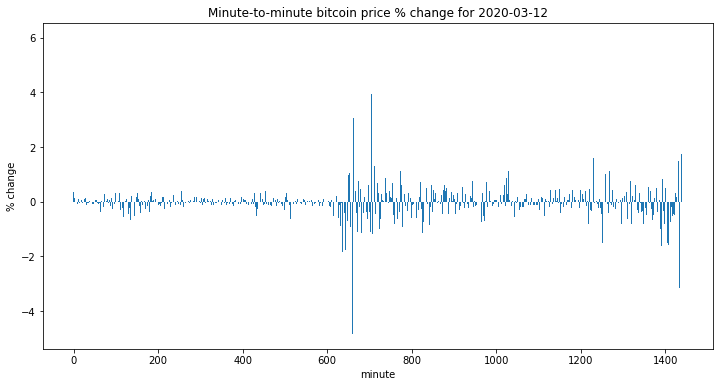

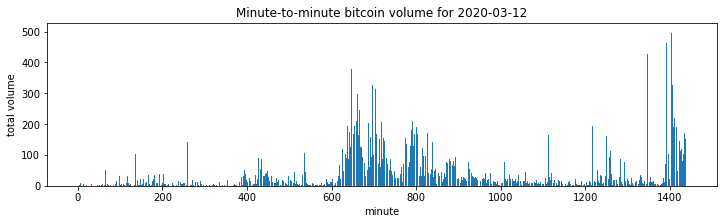

In [21]:
#plot the %change in price each minute of the day
plt.figure(figsize=(12,6))
plt.title('Minute-to-minute bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.bar(np.arange(1440), daily_price['close'])
plt.show()


#plot volume
plt.figure(figsize=(12,3))
plt.title('Minute-to-minute bitcoin volume for {}'.format(single_day))
plt.ylabel('total volume')
plt.xlabel('minute')
#plt.ylim(-500,10000)
plt.bar(np.arange(1440), daily_price['volume'])
plt.show()


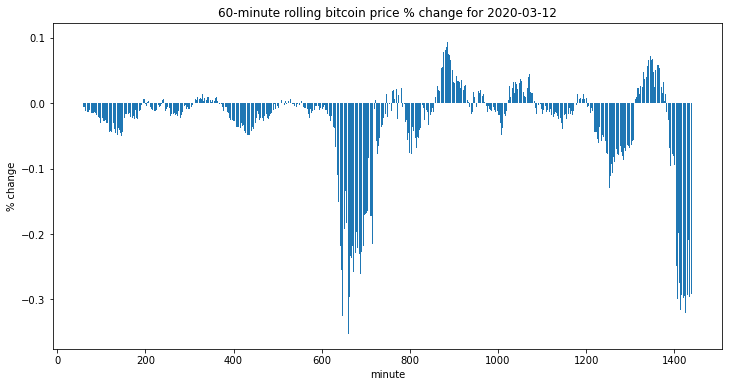

In [22]:
#ploting the changes with a rolling window to smooth the data.
window_size = 60 #minutes
windowed = daily_price['close'].rolling(window=window_size)
smoothed_price_mean = windowed.mean()

plt.figure(figsize=(12,6))
plt.title('60-minute rolling bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.bar(np.arange(len(smoothed_price_mean)), smoothed_price_mean)
plt.show()

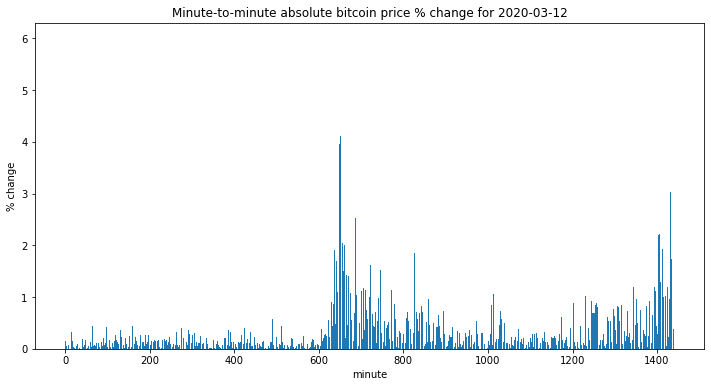

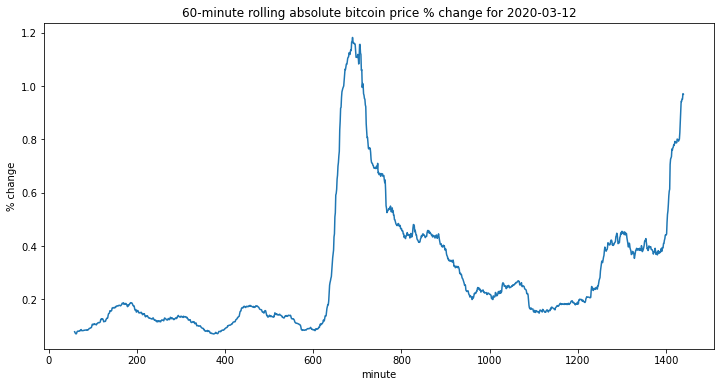

In [23]:
#"rectifiying" price changes by calculating absolute values and envelope.
rectified_price = daily_price['close'].apply(np.abs)
price_envelope = rectified_price.rolling(window_size).mean()

plt.figure(figsize=(12,6))
plt.title('Minute-to-minute absolute bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.bar(np.arange(len(rectified_price)), rectified_price)
plt.show()

plt.figure(figsize=(12,6))
plt.title('60-minute rolling absolute bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.plot(np.arange(len(price_envelope)), price_envelope)
plt.show()

#Statistics that can be used as features
price_envelope_mean = price_envelope.mean()
price_envelope_max = price_envelope.max()
price_envelope_min = price_envelope.min()
price_envelope_std = price_envelope.std()
#Daily min-max range, z-score.



In [24]:
#Using a relu function (a function that returns 0 if the value is negative and the value otherwise).
relu_price = daily_price['close'].apply(lambda x: x if x > 0 else 0)
relu_price.head()

date
2020-03-12    0.368892
2020-03-12    0.000000
2020-03-12    0.148645
2020-03-12    0.000000
2020-03-12    0.096748
Name: close, dtype: float64

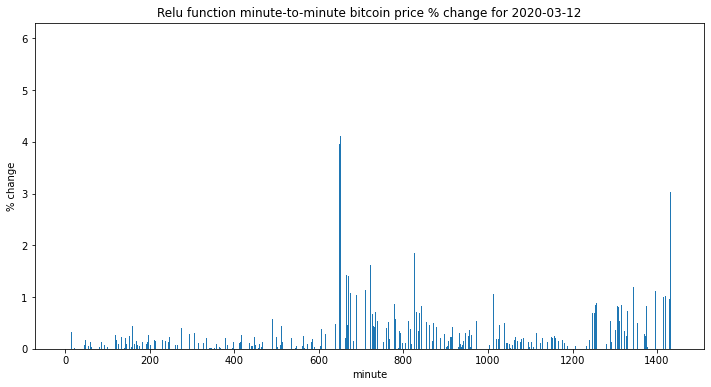

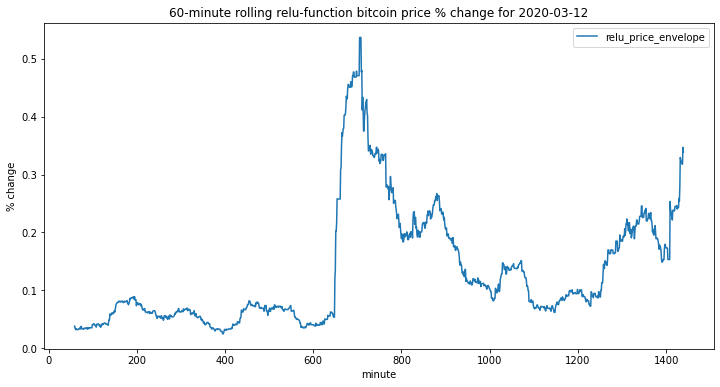

In [25]:
#plot relu_price
plt.figure(figsize=(12,6))

plt.bar(np.arange(1440), relu_price)
plt.title('Relu function minute-to-minute bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.show()

#plot envelope mean of relu_price
relu_price_envelope = relu_price.rolling(window_size).mean()
plt.figure(figsize=(12,6))
plt.title('60-minute rolling relu-function bitcoin price % change for {}'.format(single_day))
plt.ylabel('% change')
plt.xlabel('minute')
plt.plot(np.arange(1440), relu_price_envelope, label='relu_price_envelope')
#plt.plot(np.arange(1440), price_envelope, label= 'abs_price_envelope')
plt.legend(loc='best')
plt.show()

/home/julio/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py:355: ComplexWarning: Casting complex values to real discards the imaginary part
  values = ensure_float64(values)
/home/julio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


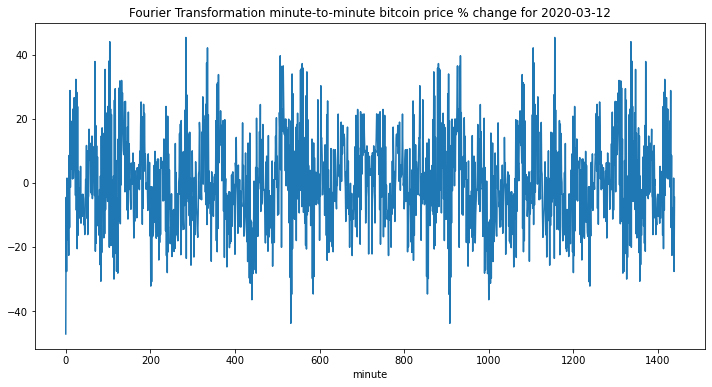

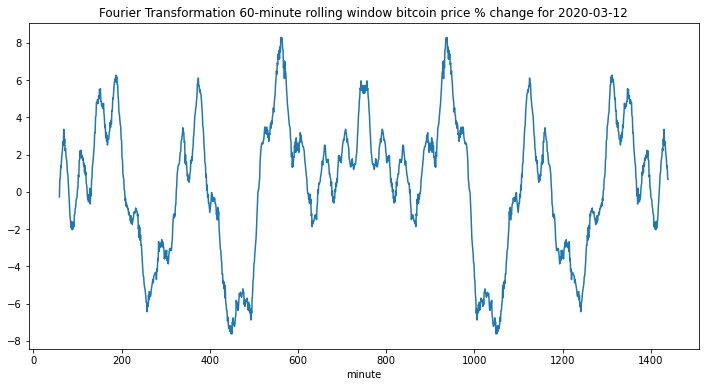

/home/julio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


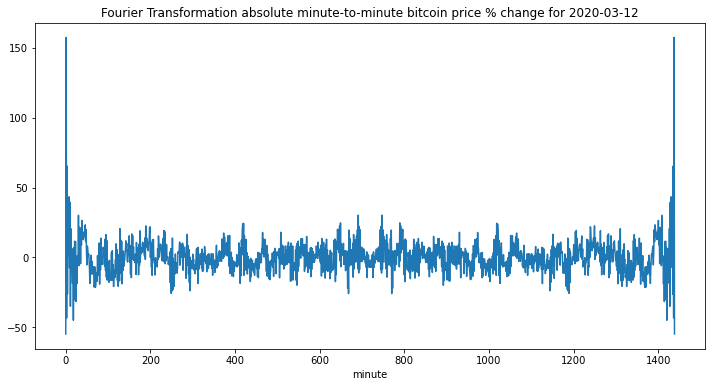

/home/julio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


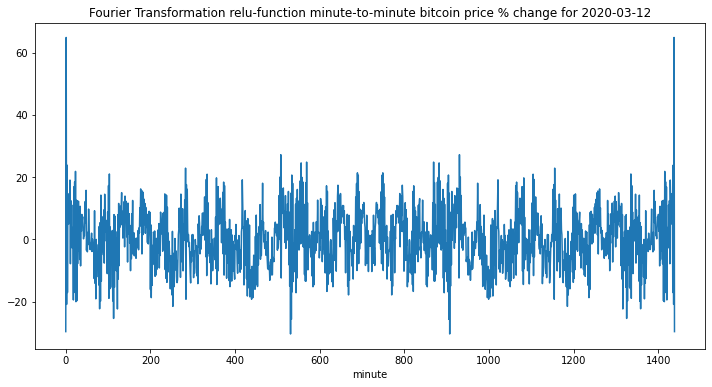

In [26]:
#Apply Fourier transformation to the price of bitcoin.
'''
The transformation is applied to: 
    a) The minute-to-minute % change and the 60-minute rolling window % change. 
    b) The minute-to-minute absolute % change and the 60-minute rolling window absolute % change.
    c) The minute-to-minute relu function % change and the 60-minute rolling window relu function % change.
'''

#a) %change price Fourier transformation.
fft_price = np.fft.fft(daily_price['close'])
smoothed_fft_price = pd.Series(fft_price).rolling(window_size).mean()

plt.figure(figsize=(12,6))
plt.title('Fourier Transformation minute-to-minute bitcoin price % change for {}'.format(single_day))
plt.ylabel('')
plt.xlabel('minute')
plt.plot(fft_price)
plt.show()

plt.figure(figsize=(12,6))
plt.title('Fourier Transformation 60-minute rolling window bitcoin price % change for {}'.format(single_day))
plt.ylabel('')
plt.xlabel('minute')
plt.plot(smoothed_fft_price)
plt.show()

#b) Absolute % chage price Fourier transformation.
fft_rectified_price = np.fft.fft(rectified_price)
plt.figure(figsize=(12,6))
plt.title('Fourier Transformation absolute minute-to-minute bitcoin price % change for {}'.format(single_day))
plt.ylabel('')
plt.xlabel('minute')
plt.plot(fft_rectified_price[1:])
plt.show()


#c) relu_price Fourier transformation
fft_relu_price = np.fft.fft(relu_price)
plt.figure(figsize=(12,6))
plt.title('Fourier Transformation relu-function minute-to-minute bitcoin price % change for {}'.format(single_day))
plt.ylabel('')
plt.xlabel('minute')
plt.plot(fft_relu_price[1:])
plt.show()




<h2>Grouping and aggregating data</h2>
<p>The data will be grouped by day and aggregated by various statistics (mean, std, max, min, max-min).</p>
<p>The data grouped is daily minute-to-minute % change, absolute value, relu function, z-score, and 60 minute rolling window.</p>

In [27]:
#Grouping and aggregating by date to extract the statistics for each day.
grouped_pct_change_df = pct_change_df.groupby(pct_change_df.index) \
                        .agg({'open': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'high': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'low': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'close': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x), lambda x: 1 if sum(x) > 0 else 0],
                              'volume': ['sum']})

grouped_pct_change_df['volume_%_change'] = grouped_pct_change_df['volume'].pct_change() * 100
grouped_pct_change_df['volume_up_down'] = grouped_pct_change_df['volume_%_change']\
                                             .apply(lambda x: 1 if x >0 else 0) 

grouped_pct_change_df['close_last'] = complete_data.groupby(complete_data['date'].dt.date)\
                                        .agg({'close': [lambda x: x.iloc[-1]]})
grouped_pct_change_df['high_max'] = complete_data.groupby(complete_data['date'].dt.date)\
                                        .agg({'high': [lambda x: max(x)]})
grouped_pct_change_df['low_min'] = complete_data.groupby(complete_data['date'].dt.date)\
                                        .agg({'low': [lambda x: min(x)]})


grouped_pct_change_df.to_csv('../data/processed/grouped_pct_change_df.csv')
grouped_pct_change_df.tail()

open                                               high  \
                mean       std       max       min <lambda_0>      mean   
date                                                                      
2021-02-16  0.001772  0.142603  1.120295 -2.018243   3.138537  0.001809   
2021-02-17  0.004221  0.111474  0.534907 -0.696707   1.231613  0.004136   
2021-02-18 -0.000717  0.082789  0.593637 -0.369362   0.962999 -0.000702   
2021-02-19  0.005675  0.107143  0.548699 -0.744249   1.292948  0.005674   
2021-02-20  0.000974  0.100767  0.491787 -0.498710   0.990497  0.000901   

                                                     ...     close            \
                 std       max       min <lambda_0>  ...       max       min   
date                                                 ...                       
2021-02-16  0.112939  0.551064 -0.975230   1.526294  ...  1.094246 -2.004532   
2021-02-17  0.097436  0.471596 -0.433999   0.905594  ...  0.497479 -0.615044   
2021-02-18  0.073041  0.606998 -0.371167   0.978165  ...  0.531812 -0.407744   
2021-02-19  0.094457  0.576054 -0.607954   1.184008  ...  0.599545 -0.720342   
2021-02-20  0.085097  0.361056 -0.422913   0.783969  ...  0.573697 -0.479553   

                                       volume volume_%_change volume_up_down  \
           <lambda_0> <lambda_1>          sum                                  
date                                                                           
2021-02-16   3.098778        1.0  8376.076088       20.965799              1   
2021-02-17   1.112523        1.0  9571.647969       14.273651              1   
2021-02-18   0.939557        0.0  6330.142919      -33.865694              0   
2021-02-19   1.319887        1.0  9229.782504       45.806858              1   
2021-02-20   1.053251        1.0  4352.850116      -52.839082              0   

           close_last  high_max   low_min  
                                           
date                                       
2021-02-16   49166.53  50602.53  47036.02  
2021-02-17   52174.28  52640.00  48896.19  
2021-02-18   51579.54  52566.98  50869.61  
2021-02-19   55988.58  56399.99  50627.32  
2021-02-20   56563.67  57553.81  55025.00  

[5 rows x 27 columns]

In [28]:
grouped_pct_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3473 entries, 2011-08-20 to 2021-02-20
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (open, mean)         3473 non-null   float64
 1   (open, std)          3473 non-null   float64
 2   (open, max)          3473 non-null   float64
 3   (open, min)          3473 non-null   float64
 4   (open, <lambda_0>)   3473 non-null   float64
 5   (high, mean)         3473 non-null   float64
 6   (high, std)          3473 non-null   float64
 7   (high, max)          3473 non-null   float64
 8   (high, min)          3473 non-null   float64
 9   (high, <lambda_0>)   3473 non-null   float64
 10  (low, mean)          3473 non-null   float64
 11  (low, std)           3473 non-null   float64
 12  (low, max)           3473 non-null   float64
 13  (low, min)           3473 non-null   float64
 14  (low, <lambda_0>)    3473 non-null   float64
 15  (close, mean)        3473 no

In [30]:
#Grouping by date and aggregating to extract the statistics for each day.
#The data is the mean of a 60-minute rolling window. 

windowed_df = pct_change_df.rolling(window=window_size)
smoothed_price_df = windowed_df.mean()
smoothed_price_df = smoothed_price_df.dropna()

grouped_smoothed_pct_change_df = smoothed_price_df.groupby(smoothed_price_df.index) \
                        .agg({'open': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'high': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'low': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'close': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x), lambda x: 1 if sum(x) > 0 else 0]
                            })

grouped_smoothed_pct_change_df.tail()

open                                               high  \
                mean       std       max       min <lambda_0>      mean   
date                                                                      
2021-02-16  0.001406  0.014295  0.054531 -0.044425   0.098957  0.001363   
2021-02-17  0.004294  0.011465  0.041187 -0.027407   0.068594  0.004272   
2021-02-18 -0.000679  0.008305  0.018662 -0.024952   0.043614 -0.000687   
2021-02-19  0.005335  0.012146  0.039494 -0.032808   0.072302  0.005343   
2021-02-20  0.001263  0.012668  0.049633 -0.038032   0.087665  0.001235   

                                                     ...       low            \
                 std       max       min <lambda_0>  ...       std       max   
date                                                 ...                       
2021-02-16  0.014469  0.056784 -0.044346   0.101130  ...  0.014274  0.047559   
2021-02-17  0.011602  0.040231 -0.026935   0.067167  ...  0.011235  0.039257   
2021-02-18  0.008115  0.018928 -0.024269   0.043197  ...  0.008512  0.019096   
2021-02-19  0.012340  0.040521 -0.032190   0.072711  ...  0.011940  0.039062   
2021-02-20  0.012685  0.050591 -0.035712   0.086303  ...  0.012775  0.047494   

                                    close                                \
                 min <lambda_0>      mean       std       max       min   
date                                                                      
2021-02-16 -0.042560   0.090118  0.001421  0.014378  0.053487 -0.044929   
2021-02-17 -0.029677   0.068935  0.004293  0.011452  0.041607 -0.027112   
2021-02-18 -0.024814   0.043909 -0.000676  0.008319  0.018667 -0.024994   
2021-02-19 -0.028918   0.067980  0.005356  0.012190  0.039869 -0.034074   
2021-02-20 -0.040147   0.087640  0.001245  0.012690  0.049944 -0.038581   

                                  
           <lambda_0> <lambda_1>  
date                              
2021-02-16   0.098416        1.0  
2021-02-17   0.068718        1.0  
2021-02-18   0.043660        0.0  
2021-02-19   0.073943        1.0  
2021-02-20   0.088525        1.0  

[5 rows x 21 columns]

In [ ]:
#Grouping the absolute value of minute-to-minute % change by date and aggregating to extract the statistics
#for each day.

abs_df = pct_change_df.drop('date', axis=1).abs()
#abs_df_rolling = abs_df.rolling(window_size).mean().dropna()


grouped_abs_df = abs_df.groupby(abs_df.index) \
                        .agg({'open': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'high': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'low': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'close': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x), lambda x: 1 if sum(x) > 0 else 0],
                              'volume': ['sum']})


grouped_abs_df.tail()

In [29]:
#Grouping the relu-function value of minute-to-minute % change by date and aggregating to extract the statistics
#for each day.

#Series applying relu function
relu_close = pct_change_df['close'].apply(lambda x: x if x > 0 else 0)
relu_open = pct_change_df['open'].apply(lambda x: x if x > 0 else 0)
relu_high = pct_change_df['high'].apply(lambda x: x if x > 0 else 0)
relu_low = pct_change_df['low'].apply(lambda x: x if x > 0 else 0)
#abs_df_rolling = abs_df.rolling(window_size).mean().dropna()

#Put series in a DataFrame
relu_df = pd.concat([relu_open, relu_high, relu_low, relu_close], axis=1)



In [30]:
#Group and aggregate the DataFrame. We don't calculate min and max-min as they are zero and equal to max respectivelly
grouped_relu_df = relu_df.groupby(relu_df.index) \
                        .agg({'open': ['mean', 'std', 'max'],
                              'high': ['mean', 'std', 'max'],
                              'low': ['mean', 'std', 'max'],
                              'close': ['mean', 'std', 'max', lambda x: 1 if (x>0).count() > (x==0).count() else 0]})

grouped_relu_df['volume'] = grouped_pct_change_df['volume']
grouped_relu_df['volume:%_change'] = grouped_pct_change_df['volume_%_change'] 
grouped_relu_df['volume_up_down']  = grouped_pct_change_df['volume_up_down']
grouped_relu_df['close_last'] = grouped_pct_change_df['close_last']
grouped_relu_df['high_max'] = grouped_pct_change_df['high_max']
grouped_relu_df['low_min'] = grouped_pct_change_df['low_min']


grouped_relu_df.to_csv('../data/processed/grouped_relu.csv')
grouped_relu_df.tail()

open                          high                      \
                mean       std       max      mean       std       max   
date                                                                     
2021-02-16  0.047664  0.084018  1.120295  0.040672  0.072535  0.551064   
2021-02-17  0.043625  0.066734  0.534907  0.037221  0.062700  0.471596   
2021-02-18  0.029906  0.050486  0.593637  0.025196  0.047095  0.606998   
2021-02-19  0.040929  0.066289  0.548699  0.035701  0.062163  0.576054   
2021-02-20  0.038525  0.058830  0.491787  0.032163  0.053964  0.361056   

                 low                         close                      \
                mean       std       max      mean       std       max   
date                                                                     
2021-02-16  0.045267  0.073854  0.990081  0.050029  0.084465  1.094246   
2021-02-17  0.040776  0.061889  0.878656  0.044918  0.067343  0.497479   
2021-02-18  0.028325  0.046320  0.574342  0.031400  0.051190  0.531812   
2021-02-19  0.038580  0.059263  0.540872  0.042745  0.069529  0.599545   
2021-02-20  0.036012  0.057136  0.425844  0.039784  0.060771  0.573697   

                            volume volume:%_change volume_up_down close_last  \
           <lambda_0>                                                          
date                                                                           
2021-02-16        0.0  8376.076088       20.965799              1   49166.53   
2021-02-17        0.0  9571.647969       14.273651              1   52174.28   
2021-02-18        0.0  6330.142919      -33.865694              0   51579.54   
2021-02-19        0.0  9229.782504       45.806858              1   55988.58   
2021-02-20        0.0  4352.850116      -52.839082              0   56563.67   

            high_max   low_min  
                                
date                            
2021-02-16  50602.53  47036.02  
2021-02-17  52640.00  48896.19  
2021-02-18  52566.98  50869.61  
2021-02-19  56399.99  50627.32  
2021-02-20  57553.81  55025.00

In [31]:
#Grouping the z-score value of minute-to-minute % change by date and aggregating to extract the statistics
#for each day.
from scipy.stats import zscore

zscore_df = pct_change_df.drop(['date', 'timestamp', 'volume'], axis=1).apply(zscore)
zscore_df = zscore_df.fillna(0)
zscore_df.tail()




,high,low,close,open
date,,,,
2021-02-20,-0.508809,-0.855804,-0.893036,-0.481453
2021-02-20,-0.456972,-0.593561,-0.640716,-0.440341
2021-02-20,-0.608016,-0.421652,-0.308313,-0.770811
2021-02-20,-0.302253,0.082664,-0.001105,-0.326856
2021-02-20,-0.255924,-0.745580,-0.484460,-0.001054


In [32]:
grouped_zscore_df = zscore_df.groupby(zscore_df.index) \
                        .agg({'open': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'high': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'low': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'close': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x), lambda x: 1 if sum(x) > 0 else 0]
                             })

grouped_zscore_df['volume'] = grouped_pct_change_df['volume']
grouped_zscore_df['volume:%_change'] = grouped_pct_change_df['volume_%_change'] 
grouped_zscore_df['volume_up_down']  = grouped_pct_change_df['volume_up_down']
grouped_zscore_df['close_last'] = grouped_pct_change_df['close_last']
grouped_zscore_df['high_max'] = grouped_pct_change_df['high_max']
grouped_zscore_df['low_min'] = grouped_pct_change_df['low_min']

grouped_zscore_df.to_csv('../data/processed/grouped_zscore.csv')
grouped_zscore_df.tail()


open                                               high  \
                mean       std       max       min <lambda_0>      mean   
date                                                                      
2021-02-16  0.005644  0.598718  4.701754 -8.475372  13.177126  0.006085   
2021-02-17  0.015928  0.468021  2.244006 -2.926913   5.170919  0.016197   
2021-02-18 -0.004807  0.347587  2.490586 -1.552559   4.043145 -0.004824   
2021-02-19  0.022030  0.449839  2.301912 -3.126521   5.428433  0.022876   
2021-02-20  0.002293  0.423070  2.062970 -2.095625   4.158595  0.002144   

                                                     ...     close            \
                 std       max       min <lambda_0>  ...       max       min   
date                                                 ...                       
2021-02-16  0.490645  2.392238 -4.238501   6.630739  ...  4.392061 -8.050886   
2021-02-17  0.423295  2.047000 -1.887210   3.934210  ...  1.995779 -2.471485   
2021-02-18  0.317315  2.635232 -1.614249   4.249481  ...  2.133645 -1.639085   
2021-02-19  0.410353  2.500804 -2.642932   5.143735  ...  2.405621 -2.894302   
2021-02-20  0.369689  1.566776 -1.839051   3.405828  ...  2.301831 -1.927430   

                                       volume volume:%_change volume_up_down  \
           <lambda_0> <lambda_1>                                               
date                                                                           
2021-02-16  12.442947        1.0  8376.076088       20.965799              1   
2021-02-17   4.467264        1.0  9571.647969       14.273651              1   
2021-02-18   3.772730        0.0  6330.142919      -33.865694              0   
2021-02-19   5.299922        1.0  9229.782504       45.806858              1   
2021-02-20   4.229260        1.0  4352.850116      -52.839082              0   

           close_last  high_max   low_min  
                                           
date                                       
2021-02-16   49166.53  50602.53  47036.02  
2021-02-17   52174.28  52640.00  48896.19  
2021-02-18   51579.54  52566.98  50869.61  
2021-02-19   55988.58  56399.99  50627.32  
2021-02-20   56563.67  57553.81  55025.00  

[5 rows x 27 columns]

In [ ]:
#Grouping the Fourier transformation value of minute-to-minute % change by date
# and aggregating to extract the statistics for each day.
'''
fft_open = pd.Series(np.fft.fft(pct_change_df['open']))
fft_high = pd.Series(np.fft.fft(pct_change_df['high']))
fft_low = pd.Series(np.fft.fft(pct_change_df['low']))
fft_close = pd.Series(np.fft.fft(pct_change_df['close']))

#Put series in a DataFrame
fft_df = pd.concat([fft_open, fft_high, fft_low, fft_close], axis=1)
fft_df.columns = ['open', 'high', 'low', 'close']
fft_df.index = pct_change_df.index

fft_df.tail()
'''

In [ ]:
#Group and aggregate the DataFrame. We don't calculate min and max-min as they are zero and equal to max respectivelly
'''
grouped_fft_df = fft_df.groupby(fft_df.index) \
                        .agg({'open': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'high': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'low': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)],
                              'close': ['mean', 'std', 'max', 'min', lambda x: max(x)-min(x)]})


grouped_fft_df.tail()
'''

In [ ]:
#save grouped DataFrames to csv files
grouped_smoothed_pct_change_df.to_csv('../data/processed/grouped_smoothed_pct_change.csv')
grouped_abs_df.to_csv('../data/processed/grouped_abs.csv')


